# The distribution of restaurants in New York

## 1 Introduction
Starting a new business, especially opening a new restaurant, requires a lot research on the current status of competing restaurants and the potential locations. New York is one of the largest cities in the world and to opening a new restaurant in the city of New York, we need to determine the appropriate location and the focus of the restaurant. Therefore, in this study, the distribution of the current restaurants in each borough is investigated. 

The questions to be answered in this investigation include 1) the top 5 most popular restaurant types in each borough and 2) how the neighborhoods in each borough cluster based on the top 5 most popular types of restaurants. 

## 2 Data

### 2.1 Data Source
source 1: https://geo.nyu.edu/catalog/nyu_2451_34572  
source 2: www.foursquare.com

### 2.2 Data Preparation

##### Step 1 import the required libraries

In [1]:
!conda install -c conda-forge geopy --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    sci

In [4]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans
import folium 

print('Libraries imported.')

Libraries imported.


##### Step 2 Get dataset from source 1 and prepare it for later use

<a id='item1'></a>

In [6]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

In [7]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [8]:
neighborhoods_data = newyork_data['features']

In [9]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [10]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)

In [11]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [12]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [13]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [14]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


##### Step 3 visualized the 306 neighborhoods in New York on the map

In [15]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

##### Step 4 Get the geographical coordinates of each borough

In [16]:
neighborhoods['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [17]:
Bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
Bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [18]:
Manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [19]:
Brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [20]:
Queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [21]:
Staten_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
Staten_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


In [22]:
Bronx_address = 'Bronx, NY'

Bronx_geolocator = Nominatim(user_agent="ny_explorer")
Bronx_location = geolocator.geocode(Bronx_address)
Bronx_latitude = Bronx_location.latitude
Bronx_longitude = Bronx_location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(Bronx_latitude, Bronx_longitude))

The geograpical coordinate of Bronx are 40.8466508, -73.8785937.


In [23]:
Manhattan_address = 'Manhattan, NY'

Manhattan_geolocator = Nominatim(user_agent="ny_explorer")
Manhattan_location = geolocator.geocode(Manhattan_address)
Manhattan_latitude = Manhattan_location.latitude
Manhattan_longitude = Manhattan_location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(Manhattan_latitude, Manhattan_longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [24]:
Brooklyn_address = 'Brooklyn, NY'

Brooklyn_geolocator = Nominatim(user_agent="ny_explorer")
Brooklyn_location = geolocator.geocode(Brooklyn_address)
Brooklyn_latitude = Brooklyn_location.latitude
Brooklyn_longitude = Brooklyn_location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(Brooklyn_latitude, Brooklyn_longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [25]:
Queens_address = 'Queens, NY'

Queens_geolocator = Nominatim(user_agent="ny_explorer")
Queens_location = geolocator.geocode(Queens_address)
Queens_latitude = Queens_location.latitude
Queens_longitude = Queens_location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(Queens_latitude, Queens_longitude))

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


In [26]:
Staten_address = 'Staten Island, NY'

Staten_geolocator = Nominatim(user_agent="ny_explorer")
Staten_location = geolocator.geocode(Staten_address)
Staten_latitude = Staten_location.latitude
Staten_longitude = Staten_location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(Staten_latitude, Staten_longitude))

The geograpical coordinate of Staten Island are 40.5834557, -74.1496048.


In [27]:
# create map of Manhattan using latitude and longitude values
Bronx_map = folium.Map(location=[Bronx_latitude, Bronx_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Bronx_data['Latitude'], Bronx_data['Longitude'], Bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Bronx_map)  
    
Bronx_map

In [28]:
# create map of Manhattan using latitude and longitude values
Manhattan_map = folium.Map(location=[Manhattan_latitude, Manhattan_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Manhattan_data['Latitude'], Manhattan_data['Longitude'], Manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Manhattan_map)  
    
Manhattan_map

In [29]:
# create map of Manhattan using latitude and longitude values
Brooklyn_map = folium.Map(location=[Brooklyn_latitude, Brooklyn_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Brooklyn_data['Latitude'], Brooklyn_data['Longitude'], Brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Brooklyn_map)  
    
Brooklyn_map

In [30]:
# create map of Manhattan using latitude and longitude values
Queens_map = folium.Map(location=[Queens_latitude, Queens_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Queens_data['Latitude'], Queens_data['Longitude'], Queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Queens_map)  
    
Queens_map

In [31]:
# create map of Manhattan using latitude and longitude values
Staten_map = folium.Map(location=[Staten_latitude, Staten_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Staten_data['Latitude'], Staten_data['Longitude'], Staten_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Staten_map)  
    
Staten_map

## 2.2 Foursquare data

In [32]:
CLIENT_ID = 'IDQYAZIZ0DDQWG33AUF0PEOMUVBDWKKROIX4J4H0DHLN0AW5' # your Foursquare ID
CLIENT_SECRET = 'PTFFUDTY3HQ42WUN1J2OYHBM3YKC045LHNK2QXMKO1WHQQSY' # your Foursquare Secret
VERSION = '20200212' # Foursquare API versionrsquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IDQYAZIZ0DDQWG33AUF0PEOMUVBDWKKROIX4J4H0DHLN0AW5
CLIENT_SECRET:PTFFUDTY3HQ42WUN1J2OYHBM3YKC045LHNK2QXMKO1WHQQSY


In [33]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

<a id='item2'></a>

In [34]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
Bronx_venues = getNearbyVenues(names=Bronx_data['Neighborhood'],
                                   latitudes=Bronx_data['Latitude'],
                                   longitudes=Bronx_data['Longitude']
                                  )



In [36]:
Manhattan_venues = getNearbyVenues(names=Manhattan_data['Neighborhood'],
                                   latitudes=Manhattan_data['Latitude'],
                                   longitudes=Manhattan_data['Longitude']
                                  )



In [37]:
Brooklyn_venues = getNearbyVenues(names=Brooklyn_data['Neighborhood'],
                                   latitudes=Brooklyn_data['Latitude'],
                                   longitudes=Brooklyn_data['Longitude']
                                  )



In [38]:
Queens_venues = getNearbyVenues(names=Queens_data['Neighborhood'],
                                   latitudes=Queens_data['Latitude'],
                                   longitudes=Queens_data['Longitude']
                                  )



In [39]:
Staten_venues = getNearbyVenues(names=Staten_data['Neighborhood'],
                                   latitudes=Staten_data['Latitude'],
                                   longitudes=Staten_data['Longitude']
                                  )



In [40]:
# save the data
Bronx_venues.to_csv("Bronx.csv", index = False)
Manhattan_venues.to_csv("Manhattan.csv", index = False)
Brooklyn_venues.to_csv("Brooklyn.csv", index = False)
Queens_venues.to_csv("Queens.csv", index = False)
Staten_venues.to_csv("Staten.csv", index = False)

#### analyze each borough

In [42]:
Bronx_r = Bronx_venues[Bronx_venues['Venue Category'].str.contains('Restaurant')]
Manhattan_r = Manhattan_venues[Manhattan_venues['Venue Category'].str.contains('Restaurant')]
Brooklyn_r = Brooklyn_venues[Brooklyn_venues['Venue Category'].str.contains('Restaurant')]
Queens_r = Queens_venues[Queens_venues['Venue Category'].str.contains('Restaurant')]
Staten_r = Staten_venues[Staten_venues['Venue Category'].str.contains('Restaurant')]

<a id='item3'></a>

#### print each Borough along with the top 5 most popular types of restaurant

In [43]:
Bronx_onehot = pd.get_dummies(Bronx_r[['Venue Category']], prefix="", prefix_sep="")

Bronx_onehot['Neighborhood'] = Bronx_venues['Neighborhood'] 

BR_fixed_columns = [Bronx_onehot.columns[-1]] + list(Bronx_onehot.columns[:-1])
Bronx_onehot = Bronx_onehot[BR_fixed_columns]

BR_sum = Bronx_onehot.sum().drop(labels = "Neighborhood").sort_values(ascending=False)

In [44]:
Manhattan_onehot = pd.get_dummies(Manhattan_r[['Venue Category']], prefix="", prefix_sep="")

Manhattan_onehot['Neighborhood'] = Manhattan_venues['Neighborhood'] 

M_fixed_columns = [Manhattan_onehot.columns[-1]] + list(Manhattan_onehot.columns[:-1])
Manhattan_onehot = Manhattan_onehot[M_fixed_columns]

M_sum = Manhattan_onehot.sum().drop(labels = "Neighborhood").sort_values(ascending=False)

In [45]:
Brooklyn_onehot = pd.get_dummies(Brooklyn_r[['Venue Category']], prefix="", prefix_sep="")

Brooklyn_onehot['Neighborhood'] = Brooklyn_venues['Neighborhood'] 

B_fixed_columns = [Brooklyn_onehot.columns[-1]] + list(Brooklyn_onehot.columns[:-1])
Brooklyn_onehot = Brooklyn_onehot[B_fixed_columns]

B_sum = Brooklyn_onehot.sum().drop(labels = "Neighborhood").sort_values(ascending=False)

In [46]:
Queens_onehot = pd.get_dummies(Queens_r[['Venue Category']], prefix="", prefix_sep="")

Queens_onehot['Neighborhood'] = Queens_venues['Neighborhood'] 

Q_fixed_columns = [Queens_onehot.columns[-1]] + list(Queens_onehot.columns[:-1])
Queens_onehot = Queens_onehot[Q_fixed_columns]

Q_sum = Queens_onehot.sum().drop(labels = "Neighborhood").sort_values(ascending=False)

In [47]:
Staten_onehot = pd.get_dummies(Staten_r[['Venue Category']], prefix="", prefix_sep="")

Staten_onehot['Neighborhood'] = Staten_venues['Neighborhood'] 

S_fixed_columns = [Staten_onehot.columns[-1]] + list(Staten_onehot.columns[:-1])
Staten_onehot =Staten_onehot[S_fixed_columns]

S_sum = Staten_onehot.sum().drop(labels = "Neighborhood").sort_values(ascending=False)

In [48]:
num_top_venues = 5
print("---Bronx top 5 most popular types of restaurant---\n Total number of restaurant :", BR_sum.sum(), "\n", BR_sum.head(), "\n", BR_sum.head()/BR_sum.sum(), "\n")
print("---Manhattan top 5 most popular types of restaurant---\n Total number of restaurant :", M_sum.sum(), "\n", M_sum.head(), "\n", M_sum.head()/M_sum.sum(), "\n")
print("---Brooklyn top 5 most popular types of restaurant---\n Total number of restaurant :", B_sum.sum(), "\n", B_sum.head(), "\n", B_sum.head()/B_sum.sum(), "\n")
print("---Queens top 5 most popular types of restaurant---\n Total number of restaurant :", Q_sum.sum(), "\n", Q_sum.head(), "\n", Q_sum.head()/Q_sum.sum(), "\n")
print("---Staten Island top 5 most popular types of restaurant---\n Total number of restaurant :", S_sum.sum(), "\n", S_sum.head(), "\n", S_sum.head()/S_sum.sum(), "\n")

---Bronx top 5 most popular types of restaurant---
 Total number of restaurant : 260 
 Italian Restaurant      39
Chinese Restaurant      37
Spanish Restaurant      32
Fast Food Restaurant    28
Mexican Restaurant      25
dtype: object 
 Italian Restaurant           0.15
Chinese Restaurant       0.142308
Spanish Restaurant       0.123077
Fast Food Restaurant     0.107692
Mexican Restaurant      0.0961538
dtype: object 

---Manhattan top 5 most popular types of restaurant---
 Total number of restaurant : 929 
 Italian Restaurant     123
American Restaurant     80
Mexican Restaurant      57
Chinese Restaurant      49
French Restaurant       49
dtype: object 
 Italian Restaurant        0.1324
American Restaurant    0.0861141
Mexican Restaurant     0.0613563
Chinese Restaurant     0.0527449
French Restaurant      0.0527449
dtype: object 

---Brooklyn top 5 most popular types of restaurant---
 Total number of restaurant : 656 
 Italian Restaurant      66
Chinese Restaurant      52
American 

In [50]:
print((BR_sum.head().sum())*100/BR_sum.sum(), "%")
print((M_sum.head().sum())*100/M_sum.sum(), "%")
print((B_sum.head().sum())*100/B_sum.sum(), "%")
print((Q_sum.head().sum())*100/Q_sum.sum(), "%")
print((S_sum.head().sum())*100/S_sum.sum(), "%")

61.92307692307692 %
38.53606027987083 %
38.56707317073171 %
35.49488054607509 %
62.82051282051282 %


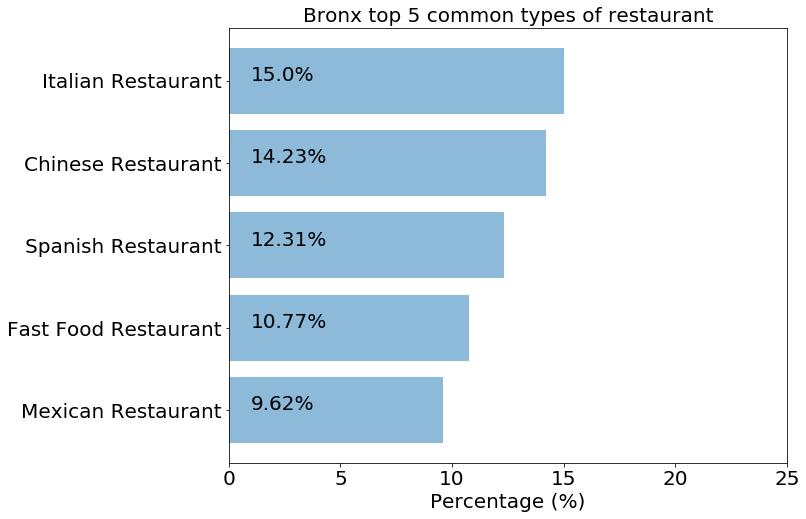

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
objects = BR_sum.head().index
y_pos = [4, 3, 2, 1, 0]
performance = (BR_sum.head()*100/BR_sum.sum()).to_list()

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects, fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlim(0, 25)
plt.xlabel('Percentage (%)', fontsize = 20)
plt.title('Bronx top 5 common types of restaurant', fontsize = 20)
for i in range(len(y_pos)):
    plt.text(1, y_pos[i], str(str(round(performance[i], 2))+"%"), fontsize = 20)

plt.show()

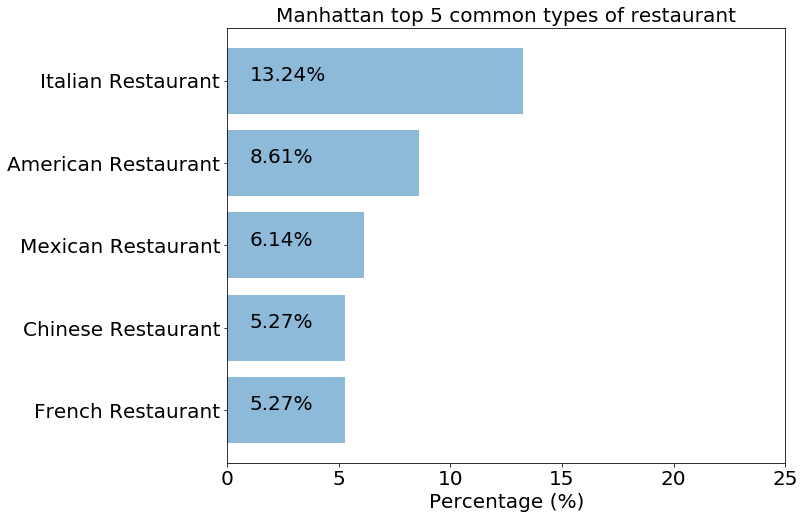

In [52]:
objects = M_sum.head().index
y_pos = [4, 3, 2, 1, 0]
performance = (M_sum.head()*100/M_sum.sum()).to_list()

plt.figure(figsize=(10,8))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects, fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlim(0, 25)
plt.xlabel('Percentage (%)', fontsize = 20)
plt.title('Manhattan top 5 common types of restaurant', fontsize = 20)
for i in range(len(y_pos)):
    plt.text(1, y_pos[i], str(str(round(performance[i], 2))+"%"), fontsize = 20)

plt.show()

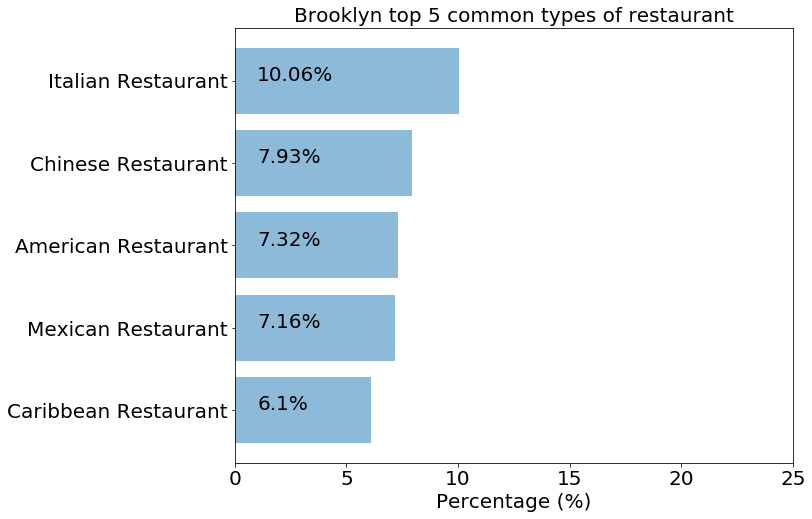

In [53]:
objects = B_sum.head().index
y_pos = [4, 3, 2, 1, 0]
performance = (B_sum.head()*100/B_sum.sum()).to_list()

plt.figure(figsize=(10,8))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects, fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlim(0, 25)
plt.xlabel('Percentage (%)', fontsize = 20)
plt.title('Brooklyn top 5 common types of restaurant', fontsize = 20)
for i in range(len(y_pos)):
    plt.text(1, y_pos[i], str(str(round(performance[i], 2))+"%"), fontsize = 20)

plt.show()

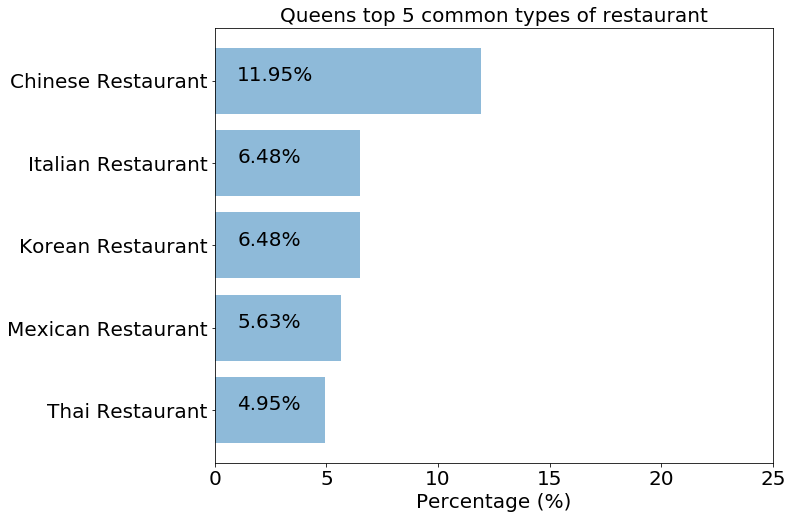

In [54]:
objects = Q_sum.head().index
y_pos = [4, 3, 2, 1, 0]
performance = (Q_sum.head()*100/Q_sum.sum()).to_list()

plt.figure(figsize=(10,8))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects, fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlim(0, 25)
plt.xlabel('Percentage (%)', fontsize = 20)
plt.title('Queens top 5 common types of restaurant', fontsize = 20)
for i in range(len(y_pos)):
    plt.text(1, y_pos[i], str(str(round(performance[i], 2))+"%"), fontsize = 20)

plt.show()

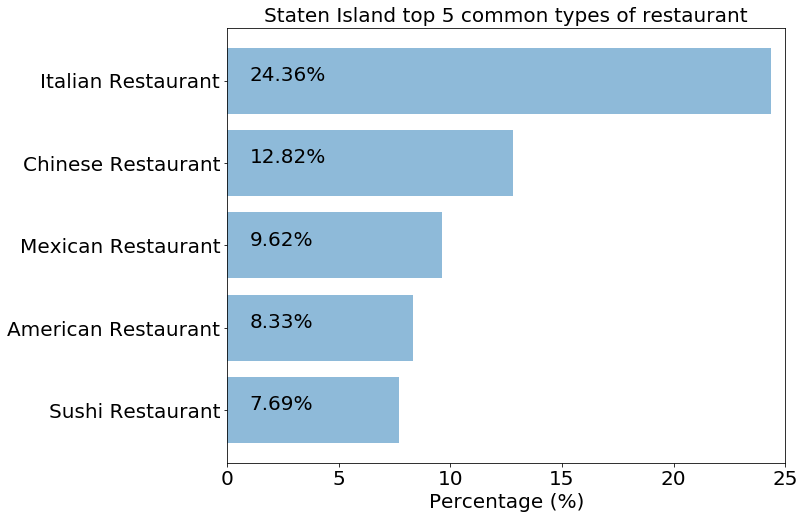

In [55]:
objects = S_sum.head().index
y_pos = [4, 3, 2, 1, 0]
performance = (S_sum.head()*100/S_sum.sum()).to_list()
plt.figure(figsize=(10,8))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects, fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlim(0, 25)
plt.xlabel('Percentage (%)', fontsize = 20)
plt.title('Staten Island top 5 common types of restaurant', fontsize = 20)
for i in range(len(y_pos)):
    plt.text(1, y_pos[i], str(str(round(performance[i], 2))+"%"), fontsize = 20)

plt.show()

## clustering analysis

In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [57]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


Manhattan_grouped = Manhattan_onehot.groupby('Neighborhood').mean().reset_index()

M_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
M_neighborhoods_venues_sorted['Neighborhood'] = Manhattan_grouped['Neighborhood']

for ind in np.arange(Manhattan_grouped.shape[0]):
    M_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Manhattan_grouped.iloc[ind, :], num_top_venues)

# set number of clusters
kclusters = 5
Manhattan_grouped_clustering = Manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
M_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Manhattan_grouped_clustering)

M_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', M_kmeans.labels_)

Manhattan_merged = Manhattan_data

Manhattan_merged = Manhattan_merged.join(M_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [58]:
Bronx_grouped = Bronx_onehot.groupby('Neighborhood').mean().reset_index()

BR_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
BR_neighborhoods_venues_sorted['Neighborhood'] = Bronx_grouped['Neighborhood']

for ind in np.arange(Bronx_grouped.shape[0]):
    BR_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bronx_grouped.iloc[ind, :], num_top_venues)

# set number of clusters
kclusters = 5
Bronx_grouped_clustering = Bronx_grouped.drop('Neighborhood', 1)

# run k-means clustering
BR_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bronx_grouped_clustering)

BR_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', BR_kmeans.labels_)

Bronx_merged = Bronx_data

Bronx_merged = Bronx_merged.join(BR_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [59]:
Brooklyn_grouped = Brooklyn_onehot.groupby('Neighborhood').mean().reset_index()

B_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
B_neighborhoods_venues_sorted['Neighborhood'] = Brooklyn_grouped['Neighborhood']

for ind in np.arange(Brooklyn_grouped.shape[0]):
    B_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Brooklyn_grouped.iloc[ind, :], num_top_venues)

# set number of clusters
kclusters = 5
Brooklyn_grouped_clustering = Brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
B_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Brooklyn_grouped_clustering)

B_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', B_kmeans.labels_)

Brooklyn_merged = Brooklyn_data

Brooklyn_merged = Brooklyn_merged.join(B_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [60]:
Queens_grouped = Queens_onehot.groupby('Neighborhood').mean().reset_index()

Q_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
Q_neighborhoods_venues_sorted['Neighborhood'] = Queens_grouped['Neighborhood']

for ind in np.arange(Queens_grouped.shape[0]):
    Q_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Queens_grouped.iloc[ind, :], num_top_venues)

# set number of clusters
kclusters = 5
Queens_grouped_clustering = Queens_grouped.drop('Neighborhood', 1)

# run k-means clustering
Q_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Queens_grouped_clustering)

Q_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', Q_kmeans.labels_)

Queens_merged = Queens_data

Queens_merged = Queens_merged.join(Q_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [61]:
Staten_grouped = Staten_onehot.groupby('Neighborhood').mean().reset_index()

S_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
S_neighborhoods_venues_sorted['Neighborhood'] = Staten_grouped['Neighborhood']

for ind in np.arange(Staten_grouped.shape[0]):
    S_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Staten_grouped.iloc[ind, :], num_top_venues)

# set number of clusters
kclusters = 5
Staten_grouped_clustering = Staten_grouped.drop('Neighborhood', 1)

# run k-means clustering
S_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Staten_grouped_clustering)

S_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', S_kmeans.labels_)

Staten_merged = Staten_data

Staten_merged = Staten_merged.join(S_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

<a id='item4'></a>

## map

In [62]:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

Bronx_map_clusters = folium.Map(location=[Bronx_latitude, Bronx_longitude], zoom_start=11)
# add markers to the map
markers_colors = []
Bronx_merged = Bronx_merged.dropna()
Bronx_merged['Cluster Labels'] = Bronx_merged['Cluster Labels'].astype(int)
for lat, lon, poi, cluster in zip(Bronx_merged['Latitude'], Bronx_merged['Longitude'], Bronx_merged['Neighborhood'], Bronx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Bronx_map_clusters)
       
Bronx_map_clusters

In [63]:
Manhattan_map_clusters = folium.Map(location=[Manhattan_latitude, Manhattan_longitude], zoom_start=11)

Manhattan_merged = Manhattan_merged.dropna()
Manhattan_merged['Cluster Labels'] = Manhattan_merged['Cluster Labels'].astype(int)
for lat, lon, poi, cluster in zip(Manhattan_merged['Latitude'], Manhattan_merged['Longitude'], Manhattan_merged['Neighborhood'], Manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Manhattan_map_clusters)
       
Manhattan_map_clusters

In [64]:

Brooklyn_map_clusters = folium.Map(location=[Brooklyn_latitude, Brooklyn_longitude], zoom_start=11)
# add markers to the map
markers_colors = []

Brooklyn_merged = Brooklyn_merged.dropna()
Brooklyn_merged['Cluster Labels'] = Brooklyn_merged['Cluster Labels'].astype(int)

for lat, lon, poi, cluster in zip(Brooklyn_merged['Latitude'], Brooklyn_merged['Longitude'], Brooklyn_merged['Neighborhood'], Brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Brooklyn_map_clusters)
       
Brooklyn_map_clusters

In [65]:

Queens_map_clusters = folium.Map(location=[Queens_latitude, Queens_longitude], zoom_start=11)
# add markers to the map
markers_colors = []

Queens_merged = Queens_merged.dropna()
Queens_merged['Cluster Labels'] = Queens_merged['Cluster Labels'].astype(int)

for lat, lon, poi, cluster in zip(Queens_merged['Latitude'], Queens_merged['Longitude'], Queens_merged['Neighborhood'], Queens_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Queens_map_clusters)
       
Queens_map_clusters

In [66]:
Staten_map_clusters = folium.Map(location=[Staten_latitude, Staten_longitude], zoom_start=11)
# add markers to the map
markers_colors = []

Staten_merged = Staten_merged.dropna()
Staten_merged['Cluster Labels'] = Staten_merged['Cluster Labels'].astype(int)

for lat, lon, poi, cluster in zip(Staten_merged['Latitude'], Staten_merged['Longitude'], Staten_merged['Neighborhood'], Staten_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Staten_map_clusters)
       
Staten_map_clusters

<a id='item5'></a>